In [1]:
import pandas as pd
import geopandas

In [2]:
file_path = 'Datasets/Flood Risk/riskPolygonsInVietnam.shp'
floodRiskHigh = geopandas.read_file(file_path)

In [3]:
floodRiskHigh = floodRiskHigh.to_crs(4326)

In [4]:
floodRiskHigh['geometry'].isna().sum()

0

<AxesSubplot:>

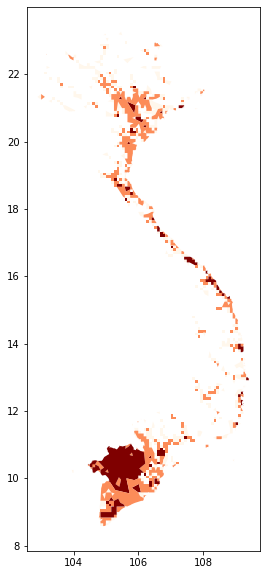

In [5]:
floodRiskHigh[floodRiskHigh['gridcode']>2].plot(column='gridcode', cmap='OrRd', figsize=(10,10))

In [6]:
import osmnx as ox
import networkx as nx
import pandana
import numpy as np

In [7]:
network = ox.load_graphml('Datasets/20210928networkGraph.graphml')

In [8]:
nodes = ox.graph_to_gdfs(network,nodes=True,edges=False)

In [9]:
edges = ox.graph_to_gdfs(network,nodes=False,edges=True)

In [10]:
edges.head(2)

osmid lanes            name    highway  oneway  \
u        v          key                                                      
75617751 75618029   0     9965723     2  Phố Tràng Tiền  secondary   False   
         6644523689 0    27933445     2   Phố Hàng Khay  secondary   False   

                          length  \
u        v          key            
75617751 75618029   0    209.413   
         6644523689 0    170.596   

                                                                  geometry  \
u        v          key                                                      
75617751 75618029   0    LINESTRING (105.85322 21.02544, 105.85341 21.0...   
         6644523689 0    LINESTRING (105.85322 21.02544, 105.85307 21.0...   

                        junction  ref maxspeed bridge access tunnel width  \
u        v          key                                                     
75617751 75618029   0        NaN  NaN      NaN    NaN    NaN    NaN   NaN   
         6644523689 0        NaN  NaN      NaN    NaN    NaN    NaN   NaN   

                        service est_width  
u        v          key                    
75617751 75618029   0       NaN       NaN  
         6644523689 0       NaN       NaN

In [11]:
edgesMerge = geopandas.sjoin(edges,floodRiskHigh,how='left',op='intersects')

In [12]:
edgesMerge.head(2)

osmid lanes            name    highway  oneway  \
u        v          key                                                      
75617751 75618029   0     9965723     2  Phố Tràng Tiền  secondary   False   
         6644523689 0    27933445     2   Phố Hàng Khay  secondary   False   

                          length  \
u        v          key            
75617751 75618029   0    209.413   
         6644523689 0    170.596   

                                                                  geometry  \
u        v          key                                                      
75617751 75618029   0    LINESTRING (105.85322 21.02544, 105.85341 21.0...   
         6644523689 0    LINESTRING (105.85322 21.02544, 105.85307 21.0...   

                        junction  ref maxspeed  ... est_width index_right  \
u        v          key                         ...                         
75617751 75618029   0        NaN  NaN      NaN  ...       NaN       230.0   
         6644523689 0        NaN  NaN      NaN  ...       NaN       230.0   

                        FID_Raster       Id gridcode FID_countr  country  \
u        v          key                                                    
75617751 75618029   0      53024.0  53024.0      5.0        1.0      1.0   
         6644523689 0      53024.0  53024.0      5.0        1.0      1.0   

                         SUM_Shape_  Shape_Leng  Shape_Area  
u        v          key                                      
75617751 75618029   0     27.979371    0.951571    0.034076  
         6644523689 0     27.979371    0.951571    0.034076  

[2 rows x 25 columns]

In [13]:
nodesMerge = geopandas.sjoin(nodes,floodRiskHigh,how='left',op='intersects')

In [146]:
graph = ox.graph_from_gdfs(gdf_edges=edgesMerge,gdf_nodes=nodesMerge)

In [175]:
graph01 = ox.graph_from_gdfs(gdf_edges=edgesMerge,gdf_nodes=nodesMerge)

In [145]:
#graph01 = ox.graph_from_gdfs(gdf_edges=edgesMerge,gdf_nodes=nodesMerge)
graph012 = ox.graph_from_gdfs(gdf_edges=edgesMerge,gdf_nodes=nodesMerge)
graph0123 = ox.graph_from_gdfs(gdf_edges=edgesMerge,gdf_nodes=nodesMerge)
graph01234 = ox.graph_from_gdfs(gdf_edges=edgesMerge,gdf_nodes=nodesMerge)
graph012345 = ox.graph_from_gdfs(gdf_edges=edgesMerge,gdf_nodes=nodesMerge)

In [176]:
len(graph01.edges())

105163

In [149]:
len(graph012.edges())

105163

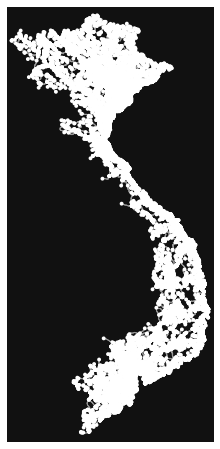

In [18]:
fig, ax = ox.plot_graph(graphCopy)



In [31]:
edgesMerge['gridcode'].fillna(0,inplace=True)

In [32]:
edgesMerge['gridcode'] = edgesMerge['gridcode'].astype(int)

In [42]:
nodesMerge['gridcode'].fillna(0,inplace=True)

In [43]:
nodesMerge['gridcode'] = nodesMerge['gridcode'].astype(int)

In [44]:
nodesMergesdict = nodesMerge['gridcode'].to_dict()

In [33]:
edgesMergedict = edgesMerge['gridcode'].to_dict()

In [109]:
edgesMergedict

{(75617751, 75618029, 0): 5,
 (75617751, 6644523689, 0): 5,
 (75617751, 1748253601, 0): 5,
 (75618029, 75617751, 0): 5,
 (75618029, 993037757, 0): 5,
 (75618029, 98010042, 0): 5,
 (76483008, 3779331222, 0): 5,
 (80399585, 1316471940, 0): 5,
 (80399585, 1406358173, 0): 5,
 (81804025, 1497544849, 0): 5,
 (81804025, 2371534393, 0): 5,
 (81806990, 102992082, 0): 5,
 (81806990, 5707161151, 0): 5,
 (81920098, 5721494366, 0): 5,
 (81962210, 5721840331, 0): 4,
 (81962210, 4772257459, 0): 4,
 (81962257, 8479360452, 0): 4,
 (81962257, 312954265, 0): 4,
 (81962257, 642954988, 0): 4,
 (82528020, 8955990590, 0): 4,
 (82528020, 5365731995, 0): 4,
 (82545909, 82545910, 0): 4,
 (82545909, 6997470666, 0): 4,
 (82545909, 6400540170, 0): 4,
 (82545910, 82545909, 0): 4,
 (82545910, 388953230, 0): 4,
 (82546684, 82547352, 0): 4,
 (82546684, 1312706693, 0): 2,
 (82547352, 3226420225, 0): 3,
 (82547352, 82546684, 0): 4,
 (84785562, 1497603128, 0): 5,
 (84806238, 5719587967, 0): 5,
 (84806238, 5707205383, 0):

In [134]:
nx.set_edge_attributes(graphCopy,edgesMergedict,'gridcode')

In [177]:
nx.set_edge_attributes(graph01,edgesMergedict,'gridcode')

In [151]:
nx.set_edge_attributes(graph012,edgesMergedict,'gridcode')

In [152]:
nx.set_edge_attributes(graph0123,edgesMergedict,'gridcode')

In [153]:
nx.set_edge_attributes(graph01234,edgesMergedict,'gridcode')

In [154]:
nx.set_edge_attributes(graph012345,edgesMergedict,'gridcode')

In [39]:
pd.DataFrame(graphCopy.edges(data=True))[2][0]

{'osmid': 9965723,
 'lanes': '2',
 'name': 'Phố Tràng Tiền',
 'highway': 'secondary',
 'oneway': False,
 'length': 209.413,
 'geometry': <shapely.geometry.linestring.LineString at 0x1ba41e73940>,
 'index_right': 230.0,
 'FID_Raster': 53024.0,
 'Id': 53024.0,
 'gridcode': 5,
 'FID_countr': 1.0,
 'country': 1.0,
 'SUM_Shape_': 27.9793709915,
 'Shape_Leng': 0.951570677355,
 'Shape_Area': 0.0340763301485}

In [84]:
### network combinations
### if flood is worst, then all gridcodes 1,2,3,4,5 are unavailable
### then 2, 3, 4, 5 are unavailable
### then 3, 4, 5 are unavailable
### then 4, 5 are unavailable
### then 5 is unavailable
### then everything is available

In [178]:
### if 2,3,4,5 are unavailable
filtr = [0, 1]
e = [(u,v,k) for u, v,k, d in graph01.edges(keys=True, data=True) if d['gridcode'] not in filtr]
graph01.remove_edges_from(e)

In [179]:
len(graph01.edges())

23616

In [180]:
len(graph.edges())

105163

In [209]:
import matplotlib.pyplot as plt

In [221]:
len(graph.edges())

105163

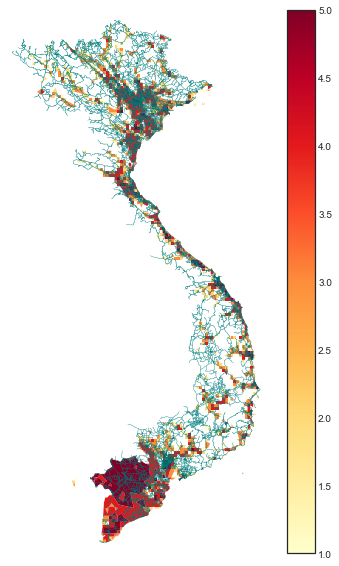

<Figure size 432x288 with 0 Axes>

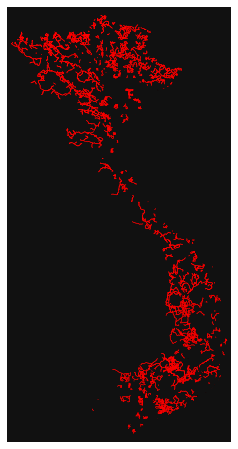

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [203]:
plt.style.use('seaborn-white')
#ox.plot._config_ax(ax=ax)
#fig, ax = plt.subplots(figsize=(16,14))
#access.plot(ax=ax,column="travel_distance", markersize=0.5, legend=True, cmap="YlOrRd", figsize=(17,10))

fig, ax = ox.plot_graph(graph01,node_size=0,edge_color='red', bgcolor='white', edge_linewidth=0.5)

#ax = ox.plot_graph(graph01,node_size=0,edge_color='red', bgcolor='white',edge_linewidth=0.5)

floodRiskHigh[floodRiskHigh['gridcode']>2].plot(ax=ax,column='gridcode', cmap='OrRd')


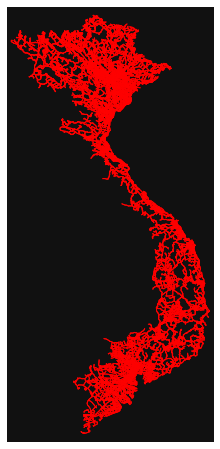

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [161]:
ox.plot_graph(graph,node_size=0,edge_color='red')

In [162]:
### if 3,4,5 are unavailable
filtr = [0, 1,2]
e = [(u,v,k) for u, v,k, d in graph012.edges(keys=True, data=True) if d['gridcode'] not in filtr]
graph012.remove_edges_from(e)

In [163]:
### if 4,5 are unavailable
filtr = [0, 1,2,3]
e = [(u,v,k) for u, v,k, d in graph0123.edges(keys=True, data=True) if d['gridcode'] not in filtr]
graph0123.remove_edges_from(e)

In [164]:
### if 5 are unavailable
filtr = [0, 1,2,3,4]
e = [(u,v,k) for u, v,k, d in graph01234.edges(keys=True, data=True) if d['gridcode'] not in filtr]
graph01234.remove_edges_from(e)

In [165]:
### if nothing is unavailable
filtr = [0, 1,2,3,4,5]
e = [(u,v,k) for u, v,k, d in graph012345.edges(keys=True, data=True) if d['gridcode'] not in filtr]
graph012345.remove_edges_from(e)

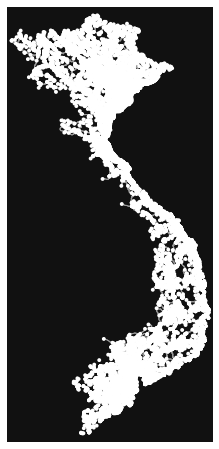

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [166]:
ox.plot_graph(graph012)

In [167]:
len(graph012.edges())

30467

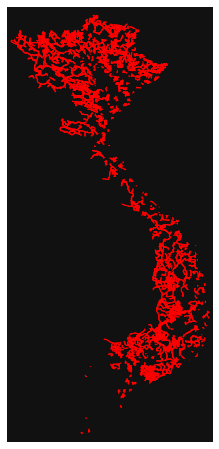

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [171]:
ox.plot_graph(graph012,node_size=0,edge_color='red')

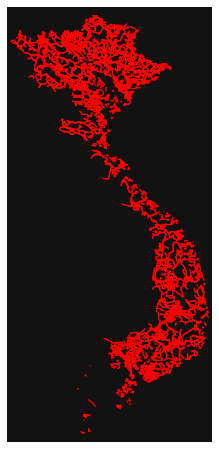

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [172]:
ox.plot_graph(graph0123,node_size=0,edge_color='red')

In [168]:
len(graph0123.edges())

45876

In [169]:
len(graph01234.edges())

83273

In [170]:
len(graph012345.edges())

105163

In [182]:
filepath = "Datasets/20211003_graph01.graphml"
ox.save_graphml(G=graph01,filepath=filepath)

In [183]:
filepath = "Datasets/20211003_graph012.graphml"
ox.save_graphml(G=graph012,filepath=filepath)

In [184]:
filepath = "Datasets/20211003_graph0123.graphml"
ox.save_graphml(G=graph0123,filepath=filepath)

In [185]:
filepath = "Datasets/20211003_graph01234.graphml"
ox.save_graphml(G=graph01234,filepath=filepath)

In [186]:
filepath = "Datasets/20211003_graph012345.graphml"
ox.save_graphml(G=graph012345,filepath=filepath)

In [73]:
graph

osmid  \
u          v          key                                                      
75617751   75618029   0                                              9965723   
           6644523689 0                                             27933445   
           1748253601 0    [28191235, 707035045, 707036649, 965041066, 70...   
75618029   75617751   0                                              9965723   
           993037757  0                                            605230286   
...                                                                      ...   
9115673228 8403586034 0                                            591222477   
           8410411507 0                    [769767776, 591222477, 769767775]   
           9115673220 0                                            986090673   
9115673344 1890375572 0                                            497085505   
9120652278 411919037  0                                            986725618   

                            lanes                 name    highway  oneway  \
u          v          key                                                   
75617751   75618029   0         2       Phố Tràng Tiền  secondary   False   
           6644523689 0         2        Phố Hàng Khay  secondary   False   
           1748253601 0    [4, 3]  Phố Đinh Tiên Hoàng   tertiary    True   
75618029   75617751   0         2       Phố Tràng Tiền  secondary   False   
           993037757  0         2       Phố Tràng Tiền  secondary   False   
...                           ...                  ...        ...     ...   
9115673228 8403586034 0       NaN                  NaN    primary   False   
           8410411507 0       NaN                  NaN    primary   False   
           9115673220 0       NaN                  NaN   tertiary   False   
9115673344 1890375572 0       NaN                  NaN   tertiary   False   
9120652278 411919037  0       NaN        Tôn Đức Thắng    primary    True   

                             length  \
u          v          key             
75617751   75618029   0     209.413   
           6644523689 0     170.596   
           1748253601 0     864.360   
75618029   75617751   0     209.413   
           993037757  0     197.468   
...                             ...   
9115673228 8403586034 0       9.535   
           8410411507 0     129.435   
           9115673220 0     208.970   
9115673344 1890375572 0    1978.123   
9120652278 411919037  0     195.090   

                                                                    geometry  \
u          v          key                                                      
75617751   75618029   0    LINESTRING (105.85322 21.02544, 105.85341 21.0...   
           6644523689 0    LINESTRING (105.85322 21.02544, 105.85307 21.0...   
           1748253601 0    LINESTRING (105.85322 21.02544, 105.85327 21.0...   
75618029   75617751   0    LINESTRING (105.85514 21.02487, 105.85499 21.0...   
           993037757  0    LINESTRING (105.85514 21.02487, 105.85528 21.0...   
...                                                                      ...   
9115673228 8403586034 0    LINESTRING (106.52704 22.83768, 106.52709 22.8...   
           8410411507 0    LINESTRING (106.52704 22.83768, 106.52701 22.8...   
           9115673220 0    LINESTRING (106.52704 22.83768, 106.52746 22.8...   
9115673344 1890375572 0    LINESTRING (106.77945 22.81554, 106.77940 22.8...   
9120652278 411919037  0    LINESTRING (106.70670 10.78175, 106.70671 10.7...   

                          junction     ref maxspeed  ... est_width  \
u          v          key                            ...             
75617751   75618029   0        NaN     NaN      NaN  ...       NaN   
           6644523689 0        NaN     NaN      NaN  ...       NaN   
           1748253601 0        NaN     NaN      NaN  ...       NaN   
75618029   75617751   0        NaN     NaN      NaN  ...       NaN   
           993037757  0        NaN     NaN      NaN  ...   

In [71]:
e

[(1264682191, 1264699199, 0),
 (1759885475, 6538608328, 0),
 (345362354, 345362457, 0),
 (345362354, 1759885399, 0),
 (345362354, 2576246063, 0),
 (345362457, 1759885243, 0),
 (345362457, 345362354, 0),
 (345362457, 5547863090, 0),
 (1759885399, 6538608328, 0),
 (1759885399, 345362354, 0),
 (2576246063, 345362354, 0),
 (1759885243, 345362457, 0),
 (1759885243, 3079969060, 0),
 (5547863090, 5547863089, 0),
 (5547863090, 1759885399, 0),
 (1759885439, 5547863092, 0),
 (888221776, 491537823, 0),
 (1016630946, 8427966978, 0),
 (3074780245, 421147745, 0),
 (3074780245, 7651385691, 0),
 (421147745, 3074780245, 0),
 (421147745, 1641603321, 0),
 (421147745, 3074780251, 0),
 (1641603321, 1715694760, 0),
 (1641603321, 3074779849, 0),
 (1641603321, 421147745, 0),
 (3074780251, 421147745, 0),
 (3074780251, 3074780253, 0),
 (3074780251, 4772054308, 0),
 (3235505311, 1611407441, 0),
 (3235505311, 3235505360, 0),
 (8299701079, 8269527791, 0),
 (456724421, 456724454, 0),
 (456724421, 456724454, 1),
 (4

In [91]:
pd.DataFrame(graph.edges(data=True))

,0,1,2
0,75617751,75618029,"{'osmid': 9965723, 'lanes': '2', 'name': 'Phố ..."
1,75617751,6644523689,"{'osmid': 27933445, 'lanes': '2', 'name': 'Phố..."
2,75617751,1748253601,"{'osmid': [28191235, 707035045, 707036649, 965..."
3,75618029,75617751,"{'osmid': 9965723, 'lanes': '2', 'name': 'Phố ..."
4,75618029,993037757,"{'osmid': 605230286, 'lanes': '2', 'name': 'Ph..."
...,...,...,...
105158,9109918323,9109918325,"{'osmid': 985409820, 'highway': 'secondary', '..."
105159,9109918393,9109918325,"{'osmid': 631311058, 'highway': 'tertiary', 'o..."
105160,9109918393,9109918399,"{'osmid': 631311061, 'highway': 'secondary', '..."
105161,9109918325,9109918326,"{'osmid': 985409820, 'highway': 'secondary', '..."


In [92]:
pd.DataFrame(graphCopy.edges(data=True))

,0,1,2
0,75617751,75618029,"{'osmid': 9965723, 'lanes': '2', 'name': 'Phố ..."
1,75617751,6644523689,"{'osmid': 27933445, 'lanes': '2', 'name': 'Phố..."
2,75617751,1748253601,"{'osmid': [28191235, 707035045, 707036649, 965..."
3,75618029,75617751,"{'osmid': 9965723, 'lanes': '2', 'name': 'Phố ..."
4,75618029,993037757,"{'osmid': 605230286, 'lanes': '2', 'name': 'Ph..."
...,...,...,...
105158,9109918323,9109918325,"{'osmid': 985409820, 'highway': 'secondary', '..."
105159,9109918393,9109918325,"{'osmid': 631311058, 'highway': 'tertiary', 'o..."
105160,9109918393,9109918399,"{'osmid': 631311061, 'highway': 'secondary', '..."
105161,9109918325,9109918326,"{'osmid': 985409820, 'highway': 'secondary', '..."


In [80]:
edgesMerge

osmid  \
u          v          key                                                      
75617751   75618029   0                                              9965723   
           6644523689 0                                             27933445   
           1748253601 0    [28191235, 707035045, 707036649, 965041066, 70...   
75618029   75617751   0                                              9965723   
           993037757  0                                            605230286   
...                                                                      ...   
9115673228 8403586034 0                                            591222477   
           8410411507 0                    [769767776, 591222477, 769767775]   
           9115673220 0                                            986090673   
9115673344 1890375572 0                                            497085505   
9120652278 411919037  0                                            986725618   

                            lanes                 name    highway  oneway  \
u          v          key                                                   
75617751   75618029   0         2       Phố Tràng Tiền  secondary   False   
           6644523689 0         2        Phố Hàng Khay  secondary   False   
           1748253601 0    [4, 3]  Phố Đinh Tiên Hoàng   tertiary    True   
75618029   75617751   0         2       Phố Tràng Tiền  secondary   False   
           993037757  0         2       Phố Tràng Tiền  secondary   False   
...                           ...                  ...        ...     ...   
9115673228 8403586034 0       NaN                  NaN    primary   False   
           8410411507 0       NaN                  NaN    primary   False   
           9115673220 0       NaN                  NaN   tertiary   False   
9115673344 1890375572 0       NaN                  NaN   tertiary   False   
9120652278 411919037  0       NaN        Tôn Đức Thắng    primary    True   

                             length  \
u          v          key             
75617751   75618029   0     209.413   
           6644523689 0     170.596   
           1748253601 0     864.360   
75618029   75617751   0     209.413   
           993037757  0     197.468   
...                             ...   
9115673228 8403586034 0       9.535   
           8410411507 0     129.435   
           9115673220 0     208.970   
9115673344 1890375572 0    1978.123   
9120652278 411919037  0     195.090   

                                                                    geometry  \
u          v          key                                                      
75617751   75618029   0    LINESTRING (105.85322 21.02544, 105.85341 21.0...   
           6644523689 0    LINESTRING (105.85322 21.02544, 105.85307 21.0...   
           1748253601 0    LINESTRING (105.85322 21.02544, 105.85327 21.0...   
75618029   75617751   0    LINESTRING (105.85514 21.02487, 105.85499 21.0...   
           993037757  0    LINESTRING (105.85514 21.02487, 105.85528 21.0...   
...                                                                      ...   
9115673228 8403586034 0    LINESTRING (106.52704 22.83768, 106.52709 22.8...   
           8410411507 0    LINESTRING (106.52704 22.83768, 106.52701 22.8...   
           9115673220 0    LINESTRING (106.52704 22.83768, 106.52746 22.8...   
9115673344 1890375572 0    LINESTRING (106.77945 22.81554, 106.77940 22.8...   
9120652278 411919037  0    LINESTRING (106.70670 10.78175, 106.70671 10.7...   

                          junction     ref maxspeed  ... est_width  \
u          v          key                            ...             
75617751   75618029   0        NaN     NaN      NaN  ...       NaN   
           6644523689 0        NaN     NaN      NaN  ...       NaN   
           1748253601 0        NaN     NaN      NaN  ...       NaN   
75618029   75617751   0        NaN     NaN      NaN  ...       NaN   
           993037757  0        NaN     NaN      NaN  ...   

In [75]:
pd.DataFrame(graphCopy.edges(keys=True,data=True))[3][0]

{'osmid': 9965723,
 'lanes': '2',
 'name': 'Phố Tràng Tiền',
 'highway': 'secondary',
 'oneway': False,
 'length': 209.413,
 'geometry': <shapely.geometry.linestring.LineString at 0x194119b0580>,
 'index_right': 230.0,
 'FID_Raster': 53024.0,
 'Id': 53024.0,
 'gridcode': 5.0,
 'FID_countr': 1.0,
 'country': 1.0,
 'SUM_Shape_': 27.9793709915,
 'Shape_Leng': 0.951570677355,
 'Shape_Area': 0.0340763301485}

In [15]:
graphCopy.remove_edges_from()

In [21]:
filepath = 'Datasets/20211002networkGraphml.graphml'
ox.save_graphml(graph,filepath=filepath)

In [16]:
filepath = 'Datasets/20211002networkGraph.xml'
ox.save_graph_xml(graph,filepath=filepath)

C:\Users\s130091\Anaconda3\envs\geo_env39\lib\site-packages\osmnx\osm_xml.py:182: UserWarning: In order for save_graph_xml to behave properly the graph must have been created with the `all_oneway` setting set to True.
  warnings.warn(msg)


In [12]:
hospitalsNodesMerge = geopandas.read_file('20210930_hospitalsNodesMerge.shp')

In [13]:
hospitalsNodesMerge.head(2)

,full_id,osm_id,osm_type,amenity,building,name,type,addr_city,addr_distr,addr_house,...,index_righ,FID_Raster,Id,gridcode,FID_countr,country,SUM_Shape_,Shape_Leng,Shape_Area,geometry
0,r7951022,7951022,relation,hospital,None,FV Hospital building,multipolygon,H??? Ch?? Minh,D7,6,...,751.0,62950.0,62950.0,5.0,1.0,1.0,27.979371,1.000000,0.048611,POINT (106.71826 10.73249)
1,r9790506,9790506,relation,hospital,None,B????nh vi????n Vi????t Nam - Cuba,multipolygon,None,None,37,...,230.0,53024.0,53024.0,5.0,1.0,1.0,27.979371,0.951571,0.034076,POINT (105.85027 21.02464)


In [210]:
nodesMerge['gridcode'].fillna(0,inplace=True)

In [211]:
edgesMerge['gridcode'].fillna(0,inplace=True)

In [212]:
edgesMerge['gridcode'].value_counts()

4.0    39702
5.0    22654
0.0    22290
3.0    17300
2.0     7780
1.0     1564
Name: gridcode, dtype: int64

In [213]:
edgesMerge

osmid  \
u          v          key                                                      
75617751   75618029   0                                              9965723   
           6644523689 0                                             27933445   
           1748253601 0    [28191235, 707035045, 707036649, 965041066, 70...   
75618029   75617751   0                                              9965723   
           993037757  0                                            605230286   
...                                                                      ...   
9115673228 8403586034 0                                            591222477   
           8410411507 0                    [769767776, 591222477, 769767775]   
           9115673220 0                                            986090673   
9115673344 1890375572 0                                            497085505   
9120652278 411919037  0                                            986725618   

                            lanes                 name    highway  oneway  \
u          v          key                                                   
75617751   75618029   0         2       Phố Tràng Tiền  secondary   False   
           6644523689 0         2        Phố Hàng Khay  secondary   False   
           1748253601 0    [4, 3]  Phố Đinh Tiên Hoàng   tertiary    True   
75618029   75617751   0         2       Phố Tràng Tiền  secondary   False   
           993037757  0         2       Phố Tràng Tiền  secondary   False   
...                           ...                  ...        ...     ...   
9115673228 8403586034 0       NaN                  NaN    primary   False   
           8410411507 0       NaN                  NaN    primary   False   
           9115673220 0       NaN                  NaN   tertiary   False   
9115673344 1890375572 0       NaN                  NaN   tertiary   False   
9120652278 411919037  0       NaN        Tôn Đức Thắng    primary    True   

                             length  \
u          v          key             
75617751   75618029   0     209.413   
           6644523689 0     170.596   
           1748253601 0     864.360   
75618029   75617751   0     209.413   
           993037757  0     197.468   
...                             ...   
9115673228 8403586034 0       9.535   
           8410411507 0     129.435   
           9115673220 0     208.970   
9115673344 1890375572 0    1978.123   
9120652278 411919037  0     195.090   

                                                                    geometry  \
u          v          key                                                      
75617751   75618029   0    LINESTRING (105.85322 21.02544, 105.85341 21.0...   
           6644523689 0    LINESTRING (105.85322 21.02544, 105.85307 21.0...   
           1748253601 0    LINESTRING (105.85322 21.02544, 105.85327 21.0...   
75618029   75617751   0    LINESTRING (105.85514 21.02487, 105.85499 21.0...   
           993037757  0    LINESTRING (105.85514 21.02487, 105.85528 21.0...   
...                                                                      ...   
9115673228 8403586034 0    LINESTRING (106.52704 22.83768, 106.52709 22.8...   
           8410411507 0    LINESTRING (106.52704 22.83768, 106.52701 22.8...   
           9115673220 0    LINESTRING (106.52704 22.83768, 106.52746 22.8...   
9115673344 1890375572 0    LINESTRING (106.77945 22.81554, 106.77940 22.8...   
9120652278 411919037  0    LINESTRING (106.70670 10.78175, 106.70671 10.7...   

                          junction     ref maxspeed  ... est_width  \
u          v          key                            ...             
75617751   75618029   0        NaN     NaN      NaN  ...       NaN   
           6644523689 0        NaN     NaN      NaN  ...       NaN   
           1748253601 0        NaN     NaN      NaN  ...       NaN   
75618029   75617751   0        NaN     NaN      NaN  ...       NaN   
           993037757  0        NaN     NaN      NaN  ...   

In [166]:
edges0 = edgesMerge[edgesMerge['gridcode']<1.0]






In [217]:
edges0.head(2)

osmid lanes        name   highway  oneway  \
u        v          key                                                  
91670279 675999845  0    313551537   NaN  30 Tháng 4  tertiary   False   
         7926615338 0    313551537   NaN  30 Tháng 4  tertiary   False   

                         length  \
u        v          key           
91670279 675999845  0    11.112   
         7926615338 0    16.387   

                                                                  geometry  \
u        v          key                                                      
91670279 675999845  0    LINESTRING (107.00400 10.95303, 107.00404 10.9...   
         7926615338 0    LINESTRING (107.00400 10.95303, 107.00400 10.9...   

                        junction  ref maxspeed  ... est_width index_right  \
u        v          key                         ...                         
91670279 675999845  0        NaN  NaN      NaN  ...       NaN         NaN   
         7926615338 0        NaN  NaN      NaN  ...       NaN         NaN   

                        FID_Raster  Id gridcode FID_countr  country  \
u        v          key                                               
91670279 675999845  0          NaN NaN      0.0        NaN      NaN   
         7926615338 0          NaN NaN      0.0        NaN      NaN   

                         SUM_Shape_  Shape_Leng  Shape_Area  
u        v          key                                      
91670279 675999845  0           NaN         NaN         NaN  
         7926615338 0           NaN         NaN         NaN  

[2 rows x 25 columns]

In [214]:
edges1 = edgesMerge[edgesMerge['gridcode']<2.0]

In [262]:
edges1_1 = edges1[['osmid', 'lanes', 'name', 'highway', 'oneway', 'length', 'geometry',
       'junction', 'ref', 'maxspeed', 'bridge', 'access', 'tunnel', 'width',
       'service', 'est_width']]

In [239]:
print(ox.__version__)

1.1.1


In [170]:
edges2 = edgesMerge[edgesMerge['gridcode']<3.0]

In [171]:
edges3 = edgesMerge[edgesMerge['gridcode']<4.0]

In [172]:
edges4 = edgesMerge[edgesMerge['gridcode']<5.0]

In [173]:
edges5 = edgesMerge

In [174]:
nodes0 = nodesMerge[nodesMerge['gridcode']<1.0]

In [175]:
nodes1 = nodesMerge[nodesMerge['gridcode']<2.0]

In [285]:
nodes1_1 = nodes1[['x','y', 'highway', 'ref', 'geometry']]

In [176]:
nodes2 = nodesMerge[nodesMerge['gridcode']<3.0]

In [177]:
nodes3 = nodesMerge[nodesMerge['gridcode']<4.0]

In [178]:
nodes4 = nodesMerge[nodesMerge['gridcode']<5.0]

In [179]:





nodes5 = nodesMerge

In [244]:
nodes0

,y,x,highway,ref,geometry,index_right,FID_Raster,Id,gridcode,FID_countr,country,SUM_Shape_,Shape_Leng,Shape_Area
osmid,,,,,,,,,,,,,,
91670279,10.953034,107.003998,NaN,NaN,POINT (107.00400 10.95303),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
91674481,10.916534,107.421282,NaN,NaN,POINT (107.42128 10.91653),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
91674485,10.926639,107.402467,NaN,NaN,POINT (107.40247 10.92664),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
91674487,10.912792,107.397526,NaN,NaN,POINT (107.39753 10.91279),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
91674489,10.908217,107.368565,NaN,NaN,POINT (107.36857 10.90822),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093349406,22.929597,106.001064,NaN,NaN,POINT (106.00106 22.92960),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9099486312,22.960018,105.844902,NaN,NaN,POINT (105.84490 22.96002),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9100030212,22.340158,106.635178,NaN,NaN,POINT (106.63518 22.34016),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [258]:
nodes1

,y,x,highway,ref,geometry,index_right,FID_Raster,Id,gridcode,FID_countr,country,SUM_Shape_,Shape_Leng,Shape_Area,X
osmid,,,,,,,,,,,,,,,
91670279,10.953034,107.003998,NaN,NaN,POINT (107.00400 10.95303),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,107.003998
91674481,10.916534,107.421282,NaN,NaN,POINT (107.42128 10.91653),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,107.421282
91674485,10.926639,107.402467,NaN,NaN,POINT (107.40247 10.92664),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,107.402467
91674487,10.912792,107.397526,NaN,NaN,POINT (107.39753 10.91279),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,107.397526
91674489,10.908217,107.368565,NaN,NaN,POINT (107.36857 10.90822),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,107.368565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093349406,22.929597,106.001064,NaN,NaN,POINT (106.00106 22.92960),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,106.001064
9099486312,22.960018,105.844902,NaN,NaN,POINT (105.84490 22.96002),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,105.844902
9100030212,22.340158,106.635178,NaN,NaN,POINT (106.63518 22.34016),NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,106.635178


In [182]:
graph0 = ox.graph_from_gdfs(gdf_nodes = nodes0,gdf_edges = edges0)

In [270]:
edges1_1

osmid lanes        name  \
u          v          key                                             
91670279   675999845  0                 313551537   NaN  30 Tháng 4   
           7926615338 0                 313551537   NaN  30 Tháng 4   
91674481   1627220281 0                  40524971   NaN  Quốc lộ 1A   
           7811425186 0                 474541014   NaN         NaN   
           4890945087 0                 775875487   NaN  Quốc lộ 1A   
...                                           ...   ...         ...   
9093349406 9093349401 0                 983497674   NaN         NaN   
9099486312 5124484062 0                 906125596   NaN         NaN   
9100030212 9100030249 0                 964179424   NaN         NaN   
9100030249 9100030212 0                 964179424   NaN         NaN   
           8775396057 0    [964185565, 948047334]   NaN         NaN   

                             highway  oneway     length  \
u          v          key                                 
91670279   675999845  0     tertiary   False     11.112   
           7926615338 0     tertiary   False     16.387   
91674481   1627220281 0        trunk   False    136.829   
           7811425186 0    secondary   False    130.235   
           4890945087 0        trunk   False   5155.294   
...                              ...     ...        ...   
9093349406 9093349401 0     tertiary   False     31.786   
9099486312 5124484062 0     tertiary   False   5044.035   
9100030212 9100030249 0    secondary   False    796.481   
9100030249 9100030212 0    secondary   False    796.481   
           8775396057 0     tertiary   False  11256.703   

                                                                    geometry  \
u          v          key                                                      
91670279   675999845  0    LINESTRING (107.00400 10.95303, 107.00404 10.9...   
           7926615338 0    LINESTRING (107.00400 10.95303, 107.00400 10.9...   
91674481   1627220281 0    LINESTRING (107.42128 10.91653, 107.42092 10.9...   
           7811425186 0    LINESTRING (107.42128 10.91653, 107.42101 10.9...   
           4890945087 0    LINESTRING (107.42128 10.91653, 107.42142 10.9...   
...                                                                      ...   
9093349406 9093349401 0    LINESTRING (106.00106 22.92960, 106.00109 22.9...   
9099486312 5124484062 0    LINESTRING (105.84490 22.96002, 105.84458 22.9...   
9100030212 9100030249 0    LINESTRING (106.63518 22.34016, 106.63515 22.3...   
9100030249 9100030212 0    LINESTRING (106.63388 22.33387, 106.63418 22.3...   
           8775396057 0    LINESTRING (106.63388 22.33387, 106.63387 22.3...   

                          junction    ref maxspeed bridge access tunnel width  \
u          v          key                                                       
91670279   675999845  0        NaN    NaN      NaN    NaN    NaN    NaN   NaN   
           7926615338 0        NaN    NaN      NaN    NaN    NaN    NaN   NaN   
91674481   1627220281 0        NaN  QL.1A       50    NaN    NaN    NaN   NaN   
           7811425186 0        NaN    NaN      NaN    NaN    NaN    NaN   NaN   
           4890945087 0        NaN  QL.1A       80    NaN    NaN    NaN   NaN   
...                            ...    ...      ...    ...    ...    ...   ...   
9093349406 9093349401 0        NaN    210      NaN    NaN    NaN    NaN   NaN   
9099486312 5124484062 0        NaN    NaN      NaN    NaN    NaN    NaN   NaN   
9100030212 9100030249 0        NaN    NaN      NaN    NaN    NaN    NaN   NaN   
9100030249 9100030212 0        NaN    NaN      NaN    NaN    NaN    NaN   NaN   
           8775396057 0        NaN    NaN      NaN    NaN    NaN    NaN   NaN   

                          service est_width  
u          v          key                    
91670279   675999845  0       NaN       NaN  
           7926615338 0       NaN       NaN  
91674481   1627220281 0       NaN       NaN  
           7811425186 0    

In [269]:
nodes1_1

,y,x,highway,ref,geometry
osmid,,,,,
91670279,10.953034,107.003998,NaN,NaN,POINT (107.00400 10.95303)
91674481,10.916534,107.421282,NaN,NaN,POINT (107.42128 10.91653)
91674485,10.926639,107.402467,NaN,NaN,POINT (107.40247 10.92664)
91674487,10.912792,107.397526,NaN,NaN,POINT (107.39753 10.91279)
91674489,10.908217,107.368565,NaN,NaN,POINT (107.36857 10.90822)
...,...,...,...,...,...
9093349406,22.929597,106.001064,NaN,NaN,POINT (106.00106 22.92960)
9099486312,22.960018,105.844902,NaN,NaN,POINT (105.84490 22.96002)
9100030212,22.340158,106.635178,NaN,NaN,POINT (106.63518 22.34016)


In [293]:
nodes1_1['x']

osmid
91670279      107.003998
91674481      107.421282
91674485      107.402467
91674487      107.397526
91674489      107.368565
                 ...    
9093349406    106.001064
9099486312    105.844902
9100030212    106.635178
9100030249    106.633883
9115641035    106.808892
Name: x, Length: 10466, dtype: float64

In [286]:
graph1_1 = ox.graph_from_gdfs(gdf_nodes = nodes1_1,gdf_edges = edges1_1)

In [284]:
pd.DataFrame(graph1_1.nodes(data=True))[1]

0        {'y': 10.9530339, 'x': 107.0039985}
1        {'y': 10.9529447, 'x': 107.0040444}
2        {'y': 10.9531812, 'x': 107.0040031}
3        {'y': 10.9165338, 'x': 107.4212819}
4        {'y': 10.9173973, 'x': 107.4203902}
                        ...                 
10673    {'y': 21.0823128, 'x': 107.4620014}
10674     {'y': 21.435217, 'x': 107.9655589}
10675    {'y': 12.9181877, 'x': 107.8214786}
10676    {'y': 20.0884659, 'x': 106.0797052}
10677    {'y': 22.0518332, 'x': 106.3418895}
Name: 1, Length: 10678, dtype: object

In [288]:
nodes1_2 = ox.graph_to_gdfs(G=graph1_1,nodes=True,edges=False)

KeyError: 'x'

In [71]:

graph2 = ox.graph_from_gdfs(gdf_nodes = nodes2,gdf_edges = edges2)
graph3 = ox.graph_from_gdfs(gdf_nodes = nodes3,gdf_edges = edges3)
graph4 = ox.graph_from_gdfs(gdf_nodes = nodes4,gdf_edges = edges4)
graph5 = ox.graph_from_gdfs(gdf_nodes = nodes5,gdf_edges = edges5)

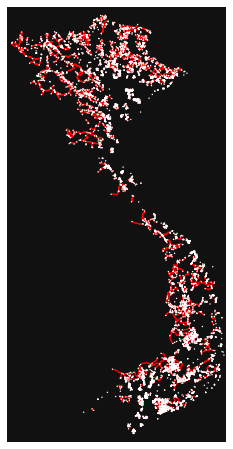

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [189]:
ox.plot_graph(G=graph0,node_size=2,edge_color='red')

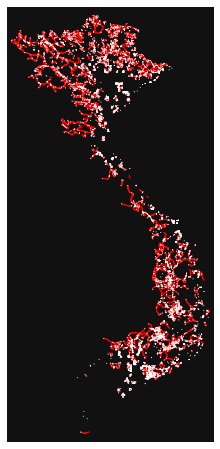

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [190]:
ox.plot_graph(G=graph1,node_size=1,edge_color='red')

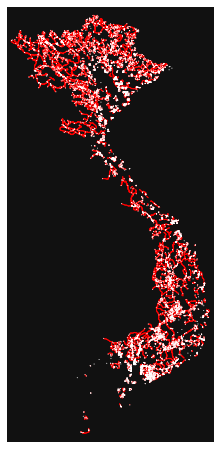

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [150]:
ox.plot_graph(G=graph2,node_size=1,edge_color='red')

In [82]:
filepath = 'Datasets/20210930networkGraph0.graphml'
ox.save_graphml(G=graph0, filepath=filepath)

In [113]:
filepath = 'Datasets/20210930networkGraph1.graphml'
ox.save_graphml(G=graph1, filepath=filepath)

In [84]:
filepath = 'Datasets/20210930networkGraph2.graphml'
ox.save_graphml(G=graph2, filepath=filepath)

In [85]:
filepath = 'Datasets/20210930networkGraph3.graphml'
ox.save_graphml(G=graph3, filepath=filepath)

In [86]:
filepath = 'Datasets/20210930networkGraph4.graphml'
ox.save_graphml(G=graph4, filepath=filepath)

In [87]:
filepath = 'Datasets/20210930networkGraph5.graphml'
ox.save_graphml(G=graph5, filepath=filepath)

<AxesSubplot:>

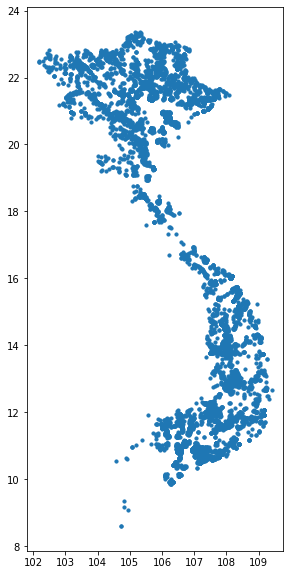

In [42]:
nodesMerge[nodesMerge['gridcode']<1].plot(figsize=(10,10),markersize=10)

<AxesSubplot:>

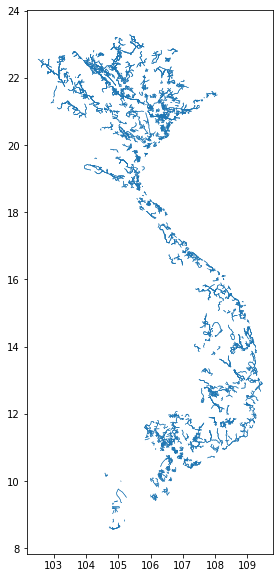

In [15]:
edgesMerge[edgesMerge['gridcode']<4].plot(figsize=(10,10),lw=0.5)

<AxesSubplot:>

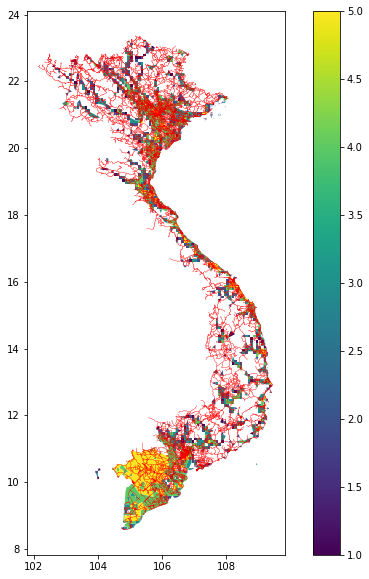

In [16]:
base = floodRiskHigh.plot(column='gridcode',alpha=1,figsize=(10,10),lw=0.5,legend=True);

edges.plot(ax=base,color='red', edgecolor='black',figsize=(10,10),lw=0.2)


In [14]:
edgesRiskmerge = edges.append(floodRiskHigh)

In [59]:
nodes.head(2)

,y,x,highway,ref,geometry
osmid,,,,,
75617751,21.025441,105.853216,NaN,NaN,POINT (105.85322 21.02544)
75618029,21.024871,105.855136,NaN,NaN,POINT (105.85514 21.02487)


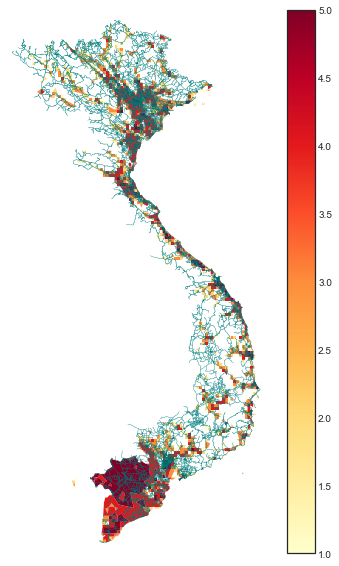

<Figure size 432x288 with 0 Axes>

In [230]:
### 03-10-2021 make this one interactive? different flood levels as interaction? 

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(8,10))

floodRiskHigh.plot(ax=ax,column='gridcode',cmap='YlOrRd',legend=True)


ox.plot_graph(graph,node_size=0,edge_color='teal', bgcolor='white', edge_linewidth=0.2, ax=ax,node_zorder=0 )

plt.tight_layout()